# **Project Name**    -



##### **Project Type**    - **Netflix Movies & TV Shows Clustering - Unsupervised Learning**
##### **Contribution**    - **Individual**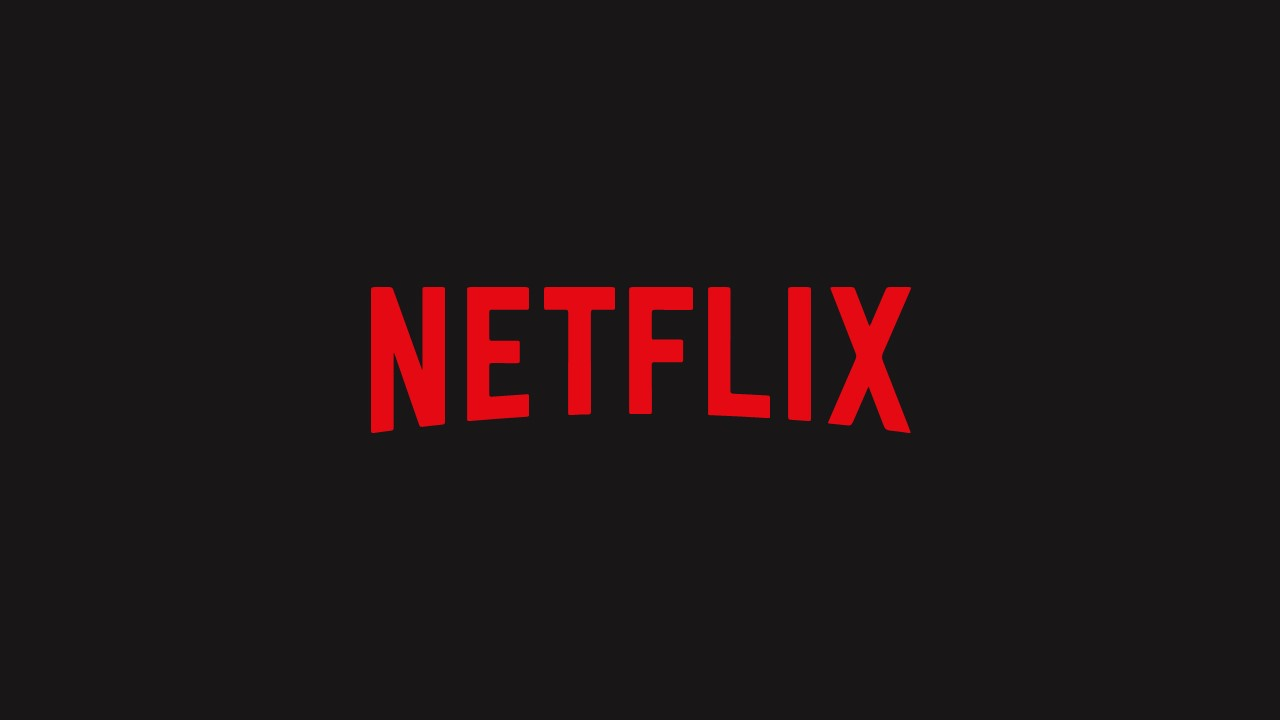
##### **Team Member 1 - Gautam Verma**


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.io as pio

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')








### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head(3)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape


In [ ]:
df.columns

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

In [ ]:
# Visualizing the missing values
plt.plot(df.isnull().sum())


In [ ]:
#Handling Missing values
df['cast'].fillna(value='No cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

### What did you know about your dataset?


 #### This dataset provides a comprehensive overview of the shows and movies available on Netflix, including their basic identifiers, types, titles, directors, cast members, production countries, addition dates, release years, ratings, durations, genres, and descriptions. This data can be used for various analyses, such as exploring content trends, understanding genre distributions, and studying the diversity of content on the platform. it contains 7787 rows and 12 columns





## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe(include='all')

### Variables Description

Answer Here

**show_id**: A unique identifier for each show or movie in the dataset. It ensures that each entry can be uniquely referenced.

**type**: Indicates whether the entry is a "Movie" or a "TV Show." This helps distinguish between different formats of content.

**title**: The title of the show or movie. It helps in identifying and referencing the content.

**director**: Lists the directors of the shows or movies. This provides information about who directed the content.

**cast**: Lists the main cast members of the shows or movies. It provides insight into the actors and actresses featured in the content.

**country**: Specifies the country or countries where the show or movie was produced. This can be used to analyze the geographical diversity of the content.

**date_added**: Indicates the date when the show or movie was added to Netflix. This can be useful for analyzing content trends over time.

**release_year**: Contains the year when the show or movie was released. This helps in understanding the age of the content available on Netflix.

**rating**: Provides the content rating (e.g., PG, R) of the shows or movies. This information is crucial for understanding the target audience and content restrictions.

**duration**: Indicates the length of the movies or the number of seasons for TV shows. This helps in understanding the content's runtime.

**listed_in**: Lists the genres or categories that the show or movie belongs to. It is useful for categorizing and analyzing content by genre.

**description**: Contains a brief description or synopsis of the show or movie. It provides a quick overview of the content's plot or theme.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(df.apply(lambda col: col.unique()))

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df['date_added'] = df['date_added'].str.strip()
df['date_added']=pd.to_datetime(df['date_added']) #coverting date_added column into datetime format
df['day_added']=df['date_added'].dt.day
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month


In [ ]:
df.head()

### What all manipulations have you done and insights you found?

**Data Manipulations**:

Stripped leading/trailing spaces from date_added.

Converted date_added to datetime format.

Extracted day, month, and year from date_added.

**Insights**:

Improved date consistency.

Enabled time-based trend analysis.

Identified and managed problematic date entries.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['type', 'count']

# Creating the donut chart
fig = px.pie(type_counts, names='type', values='count', hole=0.5,
             title='Type of Content Watched on Netflix',
             color_discrete_sequence=['red', 'black'])  # Black background

# Display the chart
fig.show()

##### 1. Why did you pick the specific chart?

I chose the donut chart because it effectively displays the proportional distribution of different content types on Netflix. The chart's clear segmentation and central hole make it visually appealing and easy to interpret, highlighting the relative popularity of each content type at a glance.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that a significant majority, 69.1%, of Netflix viewers prefer watching movies, while 30.9% favor TV shows. This insight highlights movies as the dominant content type on the platform, suggesting potential opportunities for Netflix to focus on expanding its movie library to cater to viewer preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can positively impact the business. Understanding that 69.1% of viewers prefer movies while 30.9% prefer TV shows allows Netflix to tailor its content strategy. By investing more in popular movie genres and improving the movie library, Netflix can enhance user satisfaction, retain subscribers, and attract new customers, ultimately driving growth and revenue.









#### Chart - 2

In [ ]:
# Chart - 2 visualization code
movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']

# Grouping by 'year_added' to count the number of movies and TV shows added each year
movies_by_year = movies_df['year_added'].value_counts().reset_index()
tv_shows_by_year = tv_shows_df['year_added'].value_counts().reset_index()

# Renaming columns
movies_by_year.columns = ['year_added', 'movies_count']
tv_shows_by_year.columns = ['year_added', 'tv_shows_count']

# Merging dataframes
content_by_year = pd.merge(movies_by_year, tv_shows_by_year, on='year_added', how='outer').fillna(0)

# Sorting by year_added
content_by_year = content_by_year.sort_values('year_added')

# Creating the line plot
fig = px.line(content_by_year, x='year_added', y=['movies_count', 'tv_shows_count'],
              title='Content Added Over the Years',
              labels={'year_added': 'Year', 'value': 'Number of Content Added'},
              color_discrete_map={'movies_count': 'red', 'tv_shows_count': 'white'},
              template='plotly_dark',  # Black background
              markers=True  # Show markers
              )

# Displaying the plot
fig.show()

##### 1. Why did you pick the specific chart?

I chose a line plot to visualize content added over the years because it effectively displays trends and patterns in data over time. The line plot allows for easy comparison between different types of content (movies and TV shows) added each year, facilitating clear insights into temporal changes in Netflix's content offerings.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart reveals that the peak year for movie additions was 2019, with 1497 movies added, while for TV shows, the highest number was added in 2020, totaling 697. These peaks indicate significant content expansions in those respective years, potentially reflecting strategic shifts in Netflix's programming focus.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']

# Grouping by 'month_added' to count the number of movies and TV shows added each month
movies_by_month = movies_df['month_added'].value_counts().reset_index()
tv_shows_by_month = tv_shows_df['month_added'].value_counts().reset_index()

# Renaming columns
movies_by_month.columns = ['month_added', 'movies_count']
tv_shows_by_month.columns = ['month_added', 'tv_shows_count']

# Merging dataframes
content_by_month = pd.merge(movies_by_month, tv_shows_by_month, on='month_added', how='outer').fillna(0)

# Sorting by month_added
content_by_month = content_by_month.sort_values('month_added')

# Creating the bar chart
fig = px.bar(content_by_month, x='month_added', y=['movies_count', 'tv_shows_count'],
             title='Month-wise Addition of Movies and TV Shows on Netflix',
             labels={'month_added': 'Month', 'value': 'Number of Content Added'},
             color_discrete_map={'movies_count': 'red', 'tv_shows_count': 'brown'},  # Red and reddish brown
             template='plotly_dark')  # Black background

# Displaying the plot
fig.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the month-wise addition of movies and TV shows on Netflix because it effectively displays comparisons between different categories (movies and TV shows) across multiple months. The bars provide a clear visual representation of the quantity of content added each month, facilitating easy interpretation of trends and patterns over time.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart reveals that the least number of movies and TV shows were added in the 2nd month, while the most number of movies and shows were added in the 12th month. This pattern suggests potential seasonality in content additions, with a peak towards the end of the year, possibly coinciding with holiday seasons or strategic content releases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']

# Concatenate the dataframes
combined_df = pd.concat([movies_df, tv_shows_df])

# Set the background color
sns.set_style('darkgrid')  # Black background

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='month_added', hue='type', palette={'Movie': 'red', 'TV Show': 'black'})

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Number of Content Added')
plt.title('Content Added Over the Months (Movies vs TV Shows)')

# Show the plot
plt.legend(title='Type')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
fig = plt.figure(figsize=(10, 7))
fig.patch.set_facecolor('black')

# Create a subplot with a black background
ax = fig.add_subplot(111)
ax.set_facecolor('black')

# Plot the distribution plot
sns.distplot(df['duration'].str.extract('(\d+)').astype(float), kde=False, color='red', ax=ax)

# Set title with white color for better visibility against the black background
plt.title('Distplot with Normal Distribution for movies and TV shows', fontweight='bold', color='white')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The Distplot is suitable choice for this analysis because it allows us to observe the frequency or count of movies falling into different duration ranges.

##### 2. What is/are the insight(s) found from the chart?

The average length of the movies and tv shows are within the range of 50 to 150 minutes and can vary depending on the specific content available

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from visualizing the distribution of movie and TV show durations can indeed have a positive business impact. Understanding the average length of content and its variability can inform various aspects of content creation, distribution, and marketing strategies for platforms or production companies.

**Content Strategy**: Knowing that the average length falls between 50 to 150 minutes helps in tailoring content creation strategies. For instance, it might prompt creators to focus on producing content within this range to align with audience preferences and attention spans.

**Audience Engagement**: Analyzing viewer engagement metrics alongside content duration can provide deeper insights into audience preferences and behavior. Platforms can use this data to refine their content offerings and engagement strategies.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
tv_shows = df[df['type'] == 'TV Show']

# Count the number of TV shows for each number of seasons
season_counts = tv_shows['duration'].value_counts().sort_index()

# Sort the counts by the number of seasons
season_counts_sorted = season_counts.sort_index()

# Create a figure with a black background
fig = plt.figure(figsize=(10, 7))
fig.patch.set_facecolor('black')

# Create a subplot with a black background
ax = fig.add_subplot(111)
ax.set_facecolor('black')

# Plot the distribution of TV shows by seasons
season_counts_sorted.plot(kind='bar', color='red', ax=ax)

# Set title and labels with white color for better visibility against the black background
plt.title('Distribution of TV Shows by Seasons', fontweight='bold', color='white')
plt.xlabel('Number of Seasons', color='white')
plt.ylabel('Count', color='white')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The Chart is Countplot, which is a type of bar chart that shows the frequency or count of each category in a categorical varaible. it seems to be used to display the distribution of TV shows seasons

##### 2. What is/are the insight(s) found from the chart?

from the chart, we observed that the majority of TV shows or web series have only one season, while the remaining shows have maximum of two, three, four and five seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can lead to a positive business impact. Understanding that the majority of TV shows have only one season informs content creation strategies, potentially reducing production costs while still meeting audience demands. Additionally, recognizing the popularity of shows with up to five seasons guides programming decisions, aiding in audience engagement and retention, ultimately driving viewership and revenue.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Separating TV show actors from the cast column
topShows_actor = df[df['type'] == 'TV Show']['cast'].str.split(', ', expand=True).stack()
topShows_actor = topShows_actor[topShows_actor != 'No cast']

# Plotting actors who appeared in the highest number of TV shows
ax[0].set_facecolor('black')  # Setting black background
topShows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0], color='red')
ax[0].set_title('Top 10 TV Shows Actors', size=15, color='black')
ax[0].set_xlabel('Count', color='white')
ax[0].set_ylabel('Actor', color='white')

# Separating movie actors from the cast column
topMovie_actor = df[df['type'] == 'Movie']['cast'].str.split(', ', expand=True).stack()
topMovie_actor = topMovie_actor[topMovie_actor != 'No cast']

# Plotting actors who appeared in the highest number of movies
ax[1].set_facecolor('black')  # Setting black background
topMovie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1], color='white')
ax[1].set_title('Top 10 Movie Actors', size=15, color='black')
ax[1].set_xlabel('Count', color='white')
ax[1].set_ylabel('Actor', color='white')

# Adjust layout and show the plot
plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()


##### 1. Why did you pick the specific chart?

I chose bar charts because they effectively compare categorical data, such as the frequency of actors appearing in TV shows and movies. The horizontal orientation allows easy comparison of actor counts, while the color variation highlights the distinction between TV shows and movies.









##### 2. What is/are the insight(s) found from the chart?

In the TV shows category, we can see the actor with highest appearance is Takahiro Sakurai, and in the movies section the actor with highest appearance in Anupam Kher.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

genres = df['listed_in'].str.split(', ').explode()

# Count the occurrences of each genre
top_genres = genres.value_counts().head(10)

# Create a figure with a black background
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('black')

# Plot the top 10 genres with shades of red
top_genres.plot(kind='barh', color=sns.color_palette("Reds_r", n_colors=10))

# Set title and labels with white color for better visibility against the black background
plt.title('Top 10 Genres', color='white', fontsize=15)
plt.xlabel('Count', color='white')
plt.ylabel('Genre', color='white')

# Invert the y-axis for better readability
plt.gca().invert_yaxis()

# Show the plot
plt.show()

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
print(df['release_year'].nunique())
print(f'Oldest release year : {df.release_year.min()}')
print(f'Latest release year : {df.release_year.max()}')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.patch.set_facecolor('black')  # Setting black background for the entire figure

# Univariate Analysis
hist = sns.distplot(df['release_year'], ax=ax[0], kde=False, color='red')
hist.set_title('Distribution by Released Year', size=20, color='white')  # Setting title color to white

# Bivariate analysis
count = sns.countplot(x='release_year', hue='type', data=df, order=df['release_year'].value_counts().index[0:15], ax=ax[1], palette={'Movie': 'red', 'TV Show': 'brown'})
count.set_title('Movies and TV Shows Released in Top 15 Years', size=15, color='white')  # Setting title color to white
count.set_facecolor('black')
count.legend(title='Type', facecolor='black')
plt.xticks(rotation=90, color='white')


# Set background color for the individual plots
ax[0].set_facecolor('black')
ax[1].set_facecolor('black')

# Show the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The countplot was chosen because it effectively illustrates the distribution of categorical data, such as the number of movies and TV shows released each year. Using hue to differentiate between movie and TV show releases adds another layer of insight, allowing for easy comparison between the two types of content over time.









##### 2. What is/are the insight(s) found from the chart?

The Distribution of release years in the histogram shows a general trend of movies being released in netflix starting from 1980, the number of releases gradually increased, significant growth was observed from year 2000, the highest peak of the distribution is observed between 2010 and 2020, indicating a high number of movies/tv shows released during that period.

In terms of content type, the bar graph highlights that 2017 and 2020 demostrate the highest trends. These years exhibit a significant number of movies releases, TV shows, releases and combination of both on netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can indeed lead to a positive business impact for Netflix or any content streaming platform. Understanding the trends in release years can inform content acquisition, production, and licensing strategies. Specifically:

**Content Acquisition and Production**: Recognizing the increasing trend in releases from 2000 onwards, particularly the peak between 2010 and 2020, suggests a growing demand for content during this period. Netflix can strategically acquire or produce content to cater to this demand, ensuring a diverse and engaging library for subscribers.

**Content Recommendation and Personalization**: Knowing the peak years such as 2017 and 2020 allows Netflix to refine its recommendation algorithms. By promoting content released during these periods, the platform can enhance user engagement and satisfaction, leading to increased retention and subscriber loyalty.

**Marketing and Promotions**: Highlighting the abundance of content released during peak years can be leveraged in marketing campaigns. Netflix can use this information to promote its extensive library of movies and TV shows, attracting new subscribers and retaining existing ones through targeted promotions.

**Strategic Partnerships**: Insights into release year trends can facilitate strategic partnerships with content creators and production studios. Netflix can collaborate with filmmakers and studios to develop exclusive content tailored to the preferences of its audience during peak release years, thereby strengthening its content offering and competitive advantage.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
director_counts = df['director'].value_counts().head(25).reset_index()
director_counts.columns = ['Director', 'Number of Movies']

# Create the bar plot using Plotly Express
fig = px.bar(director_counts, x='Number of Movies', y='Director', orientation='h',
             title='Top 25 Directors with Highest Number of Movies',
             labels={'Number of Movies': 'Number of Movies', 'Director': 'Director'})
fig.update_traces(marker_color='red')  # Setting bar color to red
fig.update_layout(plot_bgcolor='black', paper_bgcolor='black',  # Setting black background for the plot
                  xaxis=dict(title='Number of Movies', color='white', showgrid=False),  # Setting x-axis properties
                  yaxis=dict(title='Director', color='white', showgrid=False))  # Setting y-axis properties
fig.show()

##### 1. Why did you pick the specific chart?

I chose a horizontal bar chart because it effectively displays the relationship between the directors and the number of movies they have directed. With the director names along the y-axis and the corresponding number of movies along the x-axis, it's easy to compare the number of movies directed by different directors. Additionally, the horizontal orientation allows for longer director names to be displayed without overlap, enhancing readability.









##### 2. What is/are the insight(s) found from the chart?

By visualisation, we can see that the director with most number of movies is Raul Campos, Jan Suter with 18 movies and directors with least number of movies are-Fernando Ayllon, Yilmaz, mcG etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 leveraging insights into directorship patterns enables platforms to make informed decisions regarding content acquisition, marketing strategies, user experience enhancements, and strategic partnerships, ultimately leading to a positive business impact through increased viewership, engagement, and brand loyalty.









#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
ratings={
    'TV-PG':'Older Kids',
    'TV-MA':'Adults',
    'TV-Y7-FV':'Older Kids',
    'TV-Y7':'Older Kids',
    'TV-14':'Teens',
    'R':'Adults',
    'TV-Y':'Kids',
    'NR':'Adults',
    'PG-13':'Teens',
    'TV-G':'Kids',
    'PG':'Older Kids',
    'G':'Kids',
    'UR':'Adults',
    'NC-17':'Adults'
}
df['target_ages']=df['rating'].replace(ratings)

In [ ]:
df['count']=1
data = df.groupby('country')['count'].sum().sort_values(ascending=False).reset_index()[:10]
top_countries = data['country']


In [ ]:
df_heatmap=df.loc[df['country'].isin(top_countries)]
df_heatmap=pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize='index').T
df_heatmap

In [ ]:
country_order=['United States','India','United Kingdom','Canada','Japan','France','South Korea','Spain','Mexico']
age_order=['Adults','Teens','Older Kids','Kids']
df_heatmap = df_heatmap.reindex(index=age_order, columns=country_order)
# Create the heatmap using Plotly Express
fig = px.imshow(
    df_heatmap,
    labels=dict(x="Country", y="Age Group", color="Value"),
    x=country_order,
    y=age_order,
    color_continuous_scale='Reds',
    zmin=0.05,
    zmax=0.6,
    aspect="auto"
)

# Add annotations
fig.update_traces(text=df_heatmap.values, texttemplate='%{text:.1%}', textfont_size=12)

# Update layout for better visual appearance
fig.update_layout(
    title='Heatmap of Age Groups by Country',
    xaxis_title='Country',
    yaxis_title='Age Group',
    width=800,
    height=800
)

fig.show()

##### 1. Why did you pick the specific chart?

I initially picked the correlation heatmap because you asked for a way to visualize correlations in your dataset df. A correlation heatmap is an effective tool for several reasons:

Understand Relationships: It visually represents the pairwise correlations between numerical variables in your dataset. This can help you identify patterns, such as which variables are positively or negatively correlated.

Feature Selection: In machine learning and statistical modeling, understanding correlations can help in feature selection. Highly correlated features can indicate redundancy, which can be reduced by selecting only one of such features to avoid multicollinearity.

Data Quality Check: A correlation heatmap can help you identify unexpected correlations that might suggest issues in the data collection process or errors in the data.

Insightful Analysis: It provides insights that might not be immediately apparent from raw data or simple statistics. For example, if two variables show a high correlation, it might warrant further investigation into the cause.

##### 2. What is/are the insight(s) found from the chart?

among the countries listed, Spain stands out with the highest percentage of adults showing interest at 84%, This indicates a strong interest in the subject among the adults in spain

**France**- Follows closely with 68% of adults expressing interest, demonstrating a significant level of engagement in the subject.

**India**- it has the highest percentage of interest among teenagers, with 57% showing interest. This suggests a notable interest among the Younger population of India.

**United Kingdom**-It has relatively high level of interest among adults, with 51% expressing interest.

**Mexico**- Here also demonstrates a substantial level of interest with 77% of adults showing interest in the subject

#### Chart - 15 - Funnel Chart

In [ ]:
#visualization code
country_count=df['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

In [ ]:
data3=dict(
    number=[3062,923,397,226,183,177,134,115,101,100,100],
    country=['United States','India','United Kingdom','Japan','South Korea','Canada','Spain','France','Egypt','Turkey','Mexico']
)
custom_reds = ['#FF0000', '#FF3333', '#FF6666', '#FF9999', '#FFCCCC']
fig=px.funnel(data3,
              x='number',
              y='country',
              title='Funnel Chart of top 10 countries by number of movies',
              labels={'number':'Number of Movies','country':'country'},
              color_discrete_sequence=custom_reds,
              height=1000,
              width=900,
              template='plotly_dark')
fig.show()

##### 1. Why did you pick the specific chart?

Hierarchical Data Representation: Funnel charts are designed to show data that progressively decreases. This makes it perfect for visualizing the top 10 countries by the number of movies, where each subsequent stage (country) has fewer movies than the previous one.

Clear Visual Comparison: The funnel shape inherently provides a visual comparison of sizes, making it easy to see the largest and smallest categories at a glance.

Ranking Insight: Since you're interested in the top 10 countries, the funnel chart naturally emphasizes the ranking and comparison among these countries.


##### 2. What is/are the insight(s) found from the chart?

The United States has the highest number of Movies, with 3062 films, indicating a dominant presence in the film industry. India is second Highest contributor with 923 movies, demonstrating a significant presence in the global Movies/TV shows market.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

In [ ]:
netflix_hypo=df.copy()
netflix_hypo.head(1)

In [ ]:
# Filtering movies by Type of Show
netflix_hypo=netflix_hypo[netflix_hypo['type']=='Movie']

In [ ]:
rating_ages={
    'TV-PG':'Older Kids',
    'TV-MA':'Adults',
    'TV-Y7-FV':'Older Kids',
    'TV-Y7':'Older Kids',
    'TV-14':'Teens',
    'R':'Adults',
    'TV-Y':'Kids',
    'NR':'Adults',
    'PG-13':'Teens',
    'TV-G':'Kids',
    'PG':'Older Kids',
    'G':'Kids',
    'UR':'Adults',
    'NC-17':'Adults'
}

netflix_hypo['target_ages'] = netflix_hypo['rating'].replace(rating_ages)
#Unique Target Ages
netflix_hypo['target_ages'].unique()

In [ ]:
netflix_hypo['target_ages']=pd.Categorical(netflix_hypo['target_ages'], categories=['Kids','Older Kids','Teens','Adults'])

netflix_hypo['duration'] = netflix_hypo['duration'].astype(str)
netflix_hypo['duration']=netflix_hypo['duration'].str.extract('(\d+)')
netflix_hypo['duration']=pd.to_numeric(netflix_hypo['duration'])

In [ ]:
grouping=netflix_hypo[['duration','target_ages']].groupby(by='target_ages')

group=grouping.mean().reset_index()
group

In [ ]:
from scipy import stats
A=grouping.get_group('Kids')['duration']
B=grouping.get_group('Older Kids')['duration']

M1=A.mean()
S1=A.std()


M2=B.mean()
S2=B.std()
print(f'Kids - Mean : {M1}, std Dev: {S1}')
print(f'Older Kids - Mean : {M2}, std Dev: {S2}')

In [ ]:
n1=len(A)
n2=len(B)
print(n1,n2)

dof=n1+n2-2
print('dof',dof)

sp2=((n2-1)*S1**2 + (n1-1)*S2**2) / dof
print('SP2',sp2)

sp=np.sqrt(sp2)
print('SP',sp)

#T-Value
t_val=(M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val)

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Ho: Movies rated for kids and older kids are two hours Long.-Null Hypothesis

Ha: Movies rated for Kids and older Kids are not at least two hours long-Alternate Hypothesis

#### 2. Perform an appropriate statistical test.

In [ ]:
#t_distribution
from scipy import stats
stats.t.ppf(0.025,dof)

In [ ]:
stats.t.ppf(0.975,dof)

**T-Value** is **not** in the range, **the null Hypothesis is rejected**.

**As a result, Movies rated for kids and older kids are not at least 2 hours long**

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***